# Heart Disease Prediction




In [20]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
import seaborn as sns # imporve visuals

#_____________________________________
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data


In [21]:
df_raw = pd.read_csv('./Data/processed.cleveland.data')
df_raw.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [22]:
df_raw.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [23]:
df_raw.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [24]:
df_raw.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [25]:
df_raw['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [26]:
df_raw['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [27]:
#misson data
#How many rows contain missing data? With question mark.
df_raw.loc[(df['ca'] =='?') | (df['thal'] =='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [29]:
df_raw

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [32]:
# Create data frame with clean data
df = df_raw.loc[(df_raw['ca'] != '?') & (df_raw['thal'] != '?')]

print(f"Raw rows:{len(df_raw)}, Clean rows:{len(df)}")

Raw rows:302, Clean rows:296


- Exportar el dataset procesado.

## SVM.

Split data - train.

In [33]:
# Copiar por valor y no referencia.
# Elimino la columan que quiero predecir.
X = df.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0


In [34]:
# Obtengo la columna por predecir.
y= df['hd'].copy()
y.head()

0    2
1    1
2    0
3    0
4    0
Name: hd, dtype: int64

In [35]:
X['cp'].unique()

array([4., 3., 2., 1.])

In [36]:
# One-Hot encoding para pasar la data cateorica a 0 y 1, en términos de columnas.
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
1,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
3,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,1,0,0


In [38]:
X_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0


In [42]:
# Al support vector machine solo le interesará predecir si esta enformo o no.
# Eliminamos los no enfermoss en y como categoría.

y_clean = y>0
y[y_clean] =1
y.unique()

array([1, 0], dtype=int64)

In [44]:
# task7. 
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [45]:
# Preliminar SVM. Construimos el SVM.
clf_svm = SVC(random_state =42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

c:\Users\alejandro.gl\Documents\Cerebellum\Quantum Computing\env_q\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


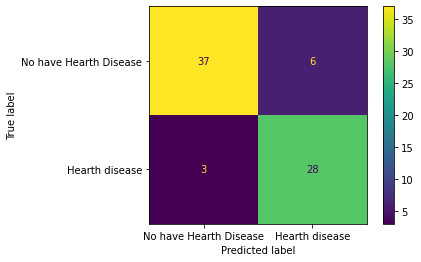

In [48]:
# Realizamos predicciones coneste
# Revisamos que tan bien se desempeño el modelo.
plot_confusion_matrix(clf_svm,X_test_scaled,y_test, display_labels=["No have Hearth Disease","Hearth disease"])

In [60]:
# Optimizamos con Cross Validation
param_grid =[
    {'C':[1,10,100,1000],
    'gamma':[0.001,0.0001],
    'kernel':['rbf']}
    #'kernel':['rbf','linear']}
]

In [61]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    verbose=2
)

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001,

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [68]:
# Reconstruct SVM.

clf_svm_optimized = SVC(random_state=42, C=10, gamma=0.001)
clf_svm_optimized.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.001, random_state=42)

c:\Users\alejandro.gl\Documents\Cerebellum\Quantum Computing\env_q\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


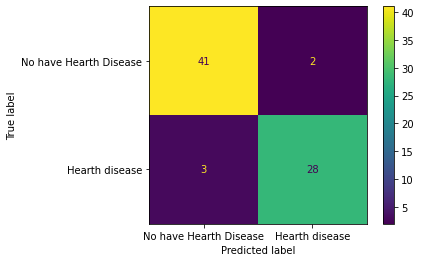

In [69]:
plot_confusion_matrix(clf_svm_optimized,X_test_scaled,y_test, display_labels=["No have Hearth Disease","Hearth disease"])

In [80]:
len(df.columns)

14

In [85]:
# Reducir dimensionalidad
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_scaled)


In [86]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
per_var

array([23.5, 13. ,  9.1,  8.7,  8.1,  6.9,  6.4,  5.5,  5.2,  4.3,  3.5,
        3. ,  2.8])

In [87]:
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]

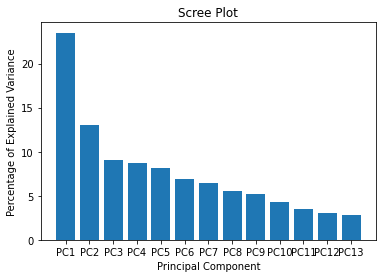

In [88]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()